In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use("fivethirtyeight")
%matplotlib inline

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv", parse_dates=['Date'])
df['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)
df.tail()

,Date,Country,Confirmed,Recovered,Deaths
76603,2021-02-19,Zimbabwe,35710,31972,1430
76604,2021-02-20,Zimbabwe,35768,32096,1432
76605,2021-02-21,Zimbabwe,35796,32125,1436
76606,2021-02-22,Zimbabwe,35862,32216,1441
76607,2021-02-23,Zimbabwe,35910,32288,1448


In [ ]:
worldwide_df = df.groupby(['Date']).sum()
worldwide_df.head()

,Confirmed,Recovered,Deaths,Total Cases
Date,,,,
2020-01-22,557,30,17,604
2020-01-23,655,32,18,705
2020-01-24,941,39,26,1006
2020-01-25,1433,42,42,1517
2020-01-26,2118,56,56,2230


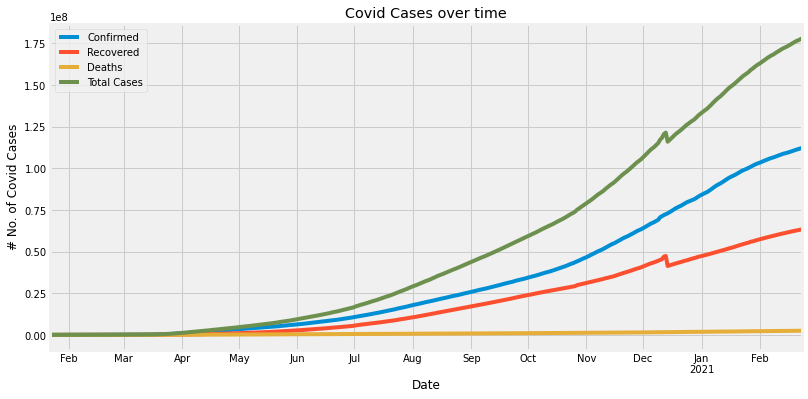

In [ ]:
w = worldwide_df.plot(figsize=(12, 6))
w.set_xlabel("Date")
w.set_ylabel("# No. of Covid Cases")
w.set_title("Covid Cases over time")

plt.show()

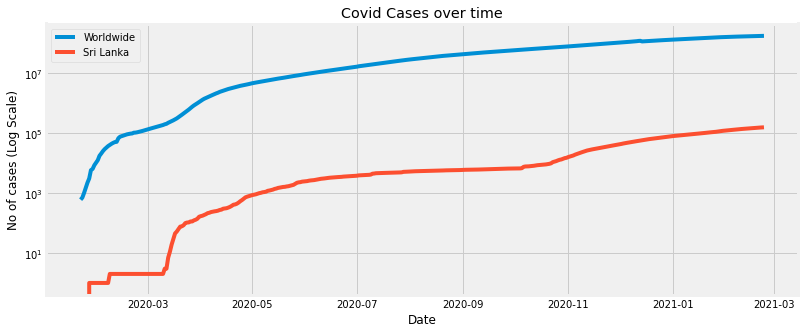

In [ ]:
lk_df = df[df['Country'] == 'Sri Lanka'].groupby(['Date']).sum()

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
ax.plot(worldwide_df['Total Cases'], label='Worldwide')
ax.plot(lk_df['Total Cases'], label='Sri Lanka')
ax.set_yscale("log")
ax.set_xlabel("Date")
ax.set_ylabel("No of cases (Log Scale)")  # No. of cases in Sri Lanka was insignificant compared to worldwide cases
ax.set_title("Covid Cases over time")
plt.legend()
plt.show()



In [ ]:
# lk_df.reset_index(inplace=True)
lk_df['Daily Confirmed'] = lk_df['Confirmed'].sub(lk_df['Confirmed'].shift())
lk_df['Daily Deaths'] = lk_df['Deaths'].sub(lk_df['Deaths'].shift())
lk_df['Daily Recoveries'] = lk_df['Recovered'].sub(lk_df['Recovered'].shift())
lk_df.tail()


,Date,Confirmed,Recovered,Deaths,Total Cases,Daily Confirmed,Daily Deaths,Daily Recoveries
394,2021-02-19,78937,72566,433,151936,517.0,3.0,743.0
395,2021-02-20,79480,73456,435,153371,543.0,2.0,890.0
396,2021-02-21,79999,74299,445,154743,519.0,10.0,843.0
397,2021-02-22,80517,75110,450,156077,518.0,5.0,811.0
398,2021-02-23,81009,75842,453,157304,492.0,3.0,732.0


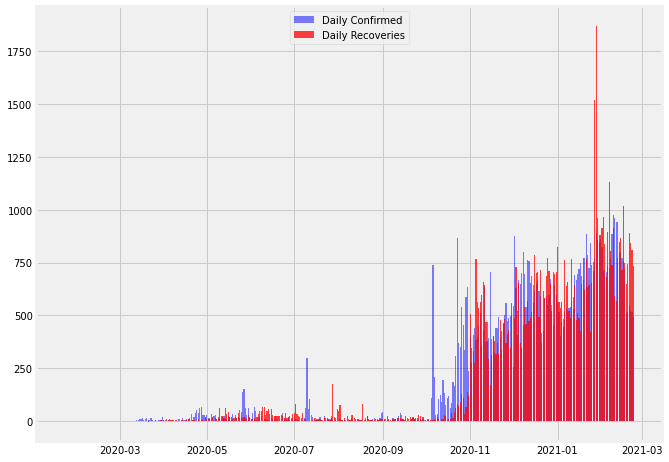

In [ ]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

ax.bar(lk_df['Date'], lk_df['Daily Confirmed'], color='b', 
       alpha = 0.5, label='Daily Confirmed')
ax.bar(lk_df['Date'], lk_df['Daily Recoveries'], color='r',
       alpha = 0.75, label="Daily Recoveries")

plt.legend()
plt.show()